# Boston Housing Machine Learning Analysis

### Executive Summary

Housing prices in recent years have blown up to great proportions. Attempting to predict what affects the prices now would be challenging, but seeing what affected it before can lead to some useful insight about today's prices. 

The Boston Housing data published by Harrison, D. and Rubinfeld, D.L. **Hedonic prices and the demand for clean air'**, J. Environ. Economics & Management from 1978 was used. 

Multiple machine learning techniques were utilized in order to provide the best model to predict the response variable MEDV, the median value of owner-occupied homes.

With the use of regression subset method, we analyzed the best regression model for five parameters. These were NOX, RM, DIS, PTRATIO, and LSTAT. The residual plot showed that the model had some curvature to it, and the Q-Q plot showed the observations mostly along the diagonal line -- the ideal trend. There is likely evidence that a certain parameter or parameters should be of a higher order given the results of the residual plot. 

By using the k-nearest neighbors method and using average number of dwellings to predict the price, it's shown that the ideal hyperparameter to predict the response variable is when k is equal to 43. This produces the lowest RMSE value, the desired value, since a lower RMSE means lower variation in error. This results in better predictions for out of sample data. The plot for this analytical method is included.

### Methodology

This project includes two analyses; the first is about the usage of regression subsets, and the second is about the k-nearest neighbors method. 

In order to avoid a highly biased model, like one done though simple linear regression, multiple regression was performed. Instead of just using one variable to explain the response variable, multiple parameters are included. However, it is not good to have a model that is too complex. 

The regression subsets method will choose the best variables and create the best model for however many variables you wish to include. As you increase the number of variables, the R-squared value, the percent of the observations of the response variable MEDV explained by the other parameters, always increases. This is inevitable because the more variables added, the more fitted the data becomes. A model that fits too well is not ideal because the model we're creating wants to be able to accurately predict out-of-sample data. So, by plotting a graph of R-squared values vs number of parameters, and judging by where the value of it increases minimially, we can choose what we deem to be the best amount of parameters to include. Then, the regression subset method, using the leaps library in R, will allow us to examine the coefficients for these variable, thus allowing for the MEDV prediction equation to be created. By examining other plots, like the residual plot and the Q-Q plot, we can see how well the model works and can possibly look into ways to improve it.

For the second analysis, the k-nearest neighbors machine learning technique was performed. The two variables we're interested in are RM, average number of rooms per dwelling, and MEDV, median value of owner-occupied homes in the $1000s, and seeing how RM affects MEDV. The goal is to tune the hyperparameter ***k***, which will influence the model most, such that the model is what we deem to be the best predictor for the response variable.

The value of ***k*** shows the ***k*** amount of observations around a specific value ***RM***. Then, the average ***MEDV*** of those observations becomes the predicted value for the specific ***RM*** chosen. This is done for all possible ***RM*** values and gives us our prediction line. A ***k*** that is too small would be too flexible, and a ***k*** that is too large would be too simple -- a nearly constant line since a large amount of the nearest neighbors are included. This leads to some of the data having a very similar value, hence the near constant prediction line. To find the optimal value of ***k***, we examine the root mean squared error (RMSE) for all ***k*** values that we decide to include. Then, we choose the ***k*** that corresponds to the lowest RMSE value.

For this method, training data and testing data are required. Because testing data -- out of sample data that we use our training data on -- is not feasible to include, we will have to split the data we have into two parts. Three quarters of the data will be used as traning data, and the remaining quarter will be testing data. We're interested in the value of the RMSE outside the training data. The training data is necessary since it will influence the testing data's results.

### Data

The data was obtained via Kaggle. It is titled **Boston House Prices-Advanced Regression Techniques** by user Fedesoriano. The variables and their descriptions are as follows:

- **CRIM:** per capita crime rate by town
- **ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX:** nitric oxides concentration (parts per 10 million) [parts/10M]
- **RM:** average number of rooms per dwelling
- **AGE:** proportion of owner-occupied units built prior to 1940
- **DIS:** weighted distances to five Boston employment centres
- **RAD:** index of accessibility to radial highways
- **TAX:** full-value property-tax rate per $10,000 [$/10k]
- **PTRATIO:** pupil-teacher ratio by town
- **B:** The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT:** % lower status of the population
- **MEDV** - Median value of owner-occupied homes in $1000's

The dependent variable of interest is MEDV for both analyses.

### Process and Results

#### Regression Subset Method

We would like to first load in the Boston Housing dataset. Only the first few observations are loaded to see if dataframe and variables are what we expect to find.

In [1]:
house = read.csv('C:/Users/andre/Downloads/boston.csv')

#Loading in the first few rows 
head(house)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


The following is to check for any NA values. This could result in errors when trying to perform data calculations, so we must take these values out immediately.

In [2]:
sum(is.na(house))
#no NA values, but if there was we'd use "hosue = na.omit(house)""

dim(house)
#14 total parameters

[1] 0

[1] 506  14

Notice how there are only 14 columns total. For the regression subset method, this would mean we would opt to use the strategy that corresponds to the small parameter ***p*** value; the method we are using checks all the combinations of variables that will produce the best regression, or multiple regression, model. 

We'll begin this process by loading the leaps library in order to use the regsubsets method.

In [3]:
library(leaps) #Used for regsubsets method

Warning message:
"package 'leaps' was built under R version 3.6.3"

We plan to use a model that is neither too biased nor has too much variance. 

A biased model is one in which there are too few parameters; while there might not be much variance when using it to predict out of sample data, the bias will be high. Simple linear regression is an example of this. However, implementing a model that is too complex will result in one that has too much variance when using it to fit out of sample data. Despite how accurate the model could be by looking at the R-squared value, this is misleading since it most likely will under or overestimate other data greatly. Therefore, we would like to aim for a model neither too biased nor has too much variance; somewhere in the middle is ideal.

Since our ***p*** is small, we are using the exhaustive method. The following cells observe the R-squared values for the best models given the number of parameters.

In [4]:
#Trying to see what predictors best fit with the price of the house.
#We go from 1 predictor to using all 13 predictors
regfit.full = regsubsets(MEDV~., data=house, nbest=1, nvmax=13, method='exhaustive')
full.summary = summary(regfit.full)

#R-squared values for the best model given the specific number of parameters
full.summary$rsq

[1] 0.5441463 0.6385616 0.6786242 0.6903077 0.7080893 0.7157742 0.7221614
 [8] 0.7266079 0.7301704 0.7352631 0.7405823 0.7406412 0.7406427

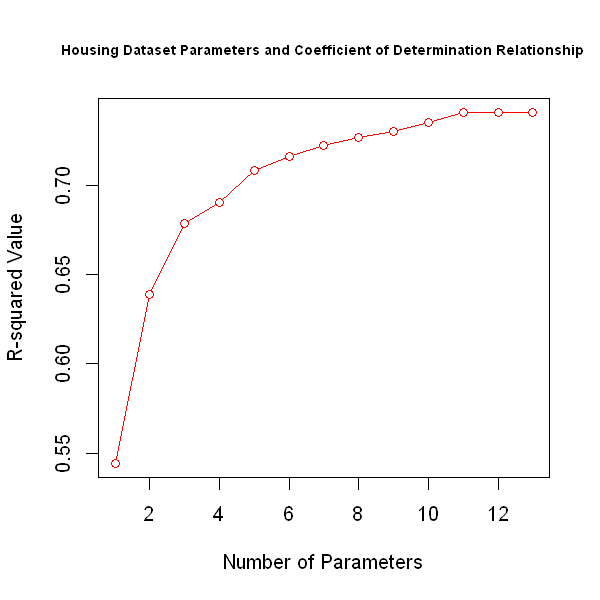

In [5]:
#Set plot height and width
options(repr.plot.width=5, repr.plot.height=5)

#Using one graph
par(mfrow=c(1,1))

plot(c(1:13), full.summary$rsq, type="l",
     xlab='Number of Parameters', ylab='R-squared Value',
     main='Housing Dataset Parameters and Coefficient of Determination Relationship', cex.main=0.7,
     col='Red',ylim=range(c(full.summary$rsq)))

#Emphasizing the R-squared values with circles on the values
points(c(1:13), full.summary$rsq, pch=21, col='red', bg=0 )

The more parameters that are added, the better the R-squared value will be. By examining this graph, we can pinpoint a good number of parameters to use to fit the best model. After 4 variables, there's minimal increase in the R-squared value. 5 to 7 parameters will most likely be the best fit. We opted for the best 5 variable model.

Now, we must get the names of the variables for this model

In [6]:
#Create the best 5 variable model
regfit5 = regsubsets(MEDV~., data=house, nbest=1, nvmax=5, method='exhaustive')
five.summary = summary(regfit5)

#The following shows what possible values we can find. We're interested in "which"
names(five.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [7]:
#"True" values show the 5 variables to use
full.summary$which[5,]

(Intercept)        CRIM          ZN       INDUS        CHAS         NOX 
       TRUE       FALSE       FALSE       FALSE       FALSE        TRUE 
         RM         AGE         DIS         RAD         TAX     PTRATIO 
       TRUE       FALSE        TRUE       FALSE       FALSE        TRUE 
          B       LSTAT 
      FALSE        TRUE

In [8]:
#The coefficients for each variable can be examined through the following function
coef(regfit.full,5)

(Intercept)         NOX          RM         DIS     PTRATIO       LSTAT 
 37.4991961 -17.9965715   4.1633074  -1.1846623  -1.0457738  -0.5810836

In [9]:
#A deeper statistical outlook can be gathered through the summary() function
mod = lm(formula = MEDV ~ NOX + RM + DIS + PTRATIO + LSTAT, data=house)
summary(mod)

#Dataframe that can be used to extract data easily if needed
matrix = summary(mod)$coefficients
matrix


Call:
lm(formula = MEDV ~ NOX + RM + DIS + PTRATIO + LSTAT, data = house)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7765  -3.0186  -0.6481   1.9752  27.7625 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.49920    4.61295   8.129 3.43e-15 ***
NOX         -17.99657    3.26095  -5.519 5.49e-08 ***
RM            4.16331    0.41203  10.104  < 2e-16 ***
DIS          -1.18466    0.16842  -7.034 6.64e-12 ***
PTRATIO      -1.04577    0.11352  -9.212  < 2e-16 ***
LSTAT        -0.58108    0.04794 -12.122  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.994 on 500 degrees of freedom
Multiple R-squared:  0.7081,	Adjusted R-squared:  0.7052 
F-statistic: 242.6 on 5 and 500 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),37.4991961,4.61294984,8.129114,3.426786e-15
NOX,-17.9965715,3.26095286,-5.518808,5.488148e-08
RM,4.1633074,0.41202784,10.104432,5.739143e-22
DIS,-1.1846623,0.16842410,-7.033805,6.642179e-12
PTRATIO,-1.0457738,0.11351844,-9.212369,8.800790e-19
LSTAT,-0.5810836,0.04793792,-12.121586,7.923392e-30


Our significance level is .05; this means any p-value below this is determined to be statistically significant e.g the likelihood of this happening by chance is below 5%. The global F-test and the individual T-tests all show that the p-values are much lower than .05; therefore, we conclude that there's sufficient evidence that these variables, and the model itself, is a good predictor for the value of the median price.

Let's examine more plots to see what else this model tells us.

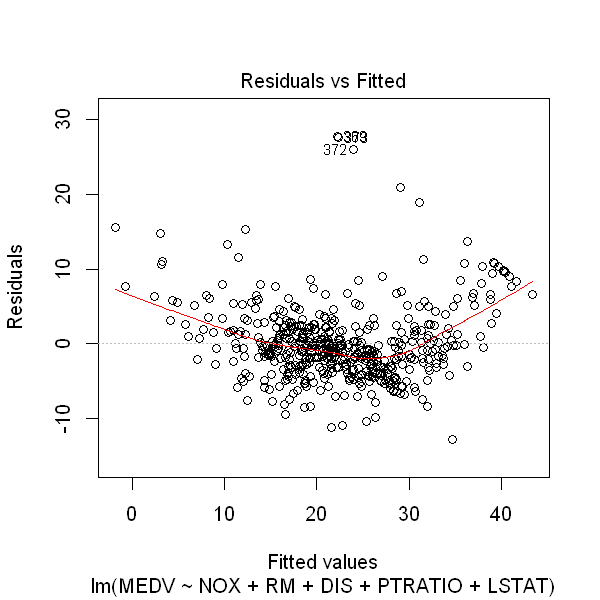

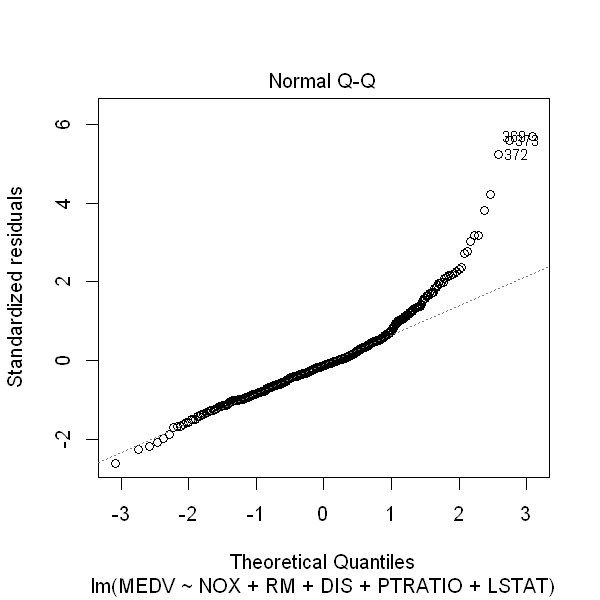

In [10]:
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(1,1))

#Residual plot and normal Q-Q plot
plot(mod, which=1:2)

Ideally, we would want the red line to be horizontal. That would indicate linearity, while one that is not so randomly scattered indicates non-linearity. The red line shows the actual residual vs fitted relationship, which may be quite curved.

For the Q-Q plot, we want to see the observations tightly along the line. Most of the observations are, but it starts to curve near the end of the graph.

These two plots show some evidence that a higher order term for one of the parameters may enhance our model. 

### K-nearest Neighbors Method

This analysis focuses on the K-nearest neighbors method. We need to create our randomized training and testing data.

In [11]:
#This package will allow access to k nearest neighbors
library(kknn)

Warning message:
"package 'kknn' was built under R version 3.6.3"

In [12]:
#Need total amount of rows
n = nrow(house)

#Variables to be tested and trained on
x = 4*house$RM
y = house$MEDV

#Implementing the desired x's and y's in a dataframe
dataframe = data.frame(x,y)

#Sanity check to make sure everything is as expected
dim(dataframe)

[1] 506   2

We don't only want to make our model based on the in-sample data. An effective model would be able to predict data outside of the given sample data. One solution is to split our data into two parts -- trained data and test data. Trained data will have about 75% of the observations, while the test data will have the reamining percentage. We're interested in the RMSE outside (outRMSE) of the training data. This is because the RMSE is a way to minimize the error and allows for more accurate predictions. the RMSE inside the training data will be used as a supplement to show how the two compare. The training data is essentially used as vital information for the test data that is created.

In [13]:
#Seed chosen to ensure randomization
set.seed(435)

#Train data. Roughly 75% chosen
tr = sample(x=n, size=380, replace=FALSE)

#dataframes corresponding to train and test data
train = dataframe[tr,]
test = dataframe[-tr,]

#k values from 1 to 350
kvec = 1:350
nk = length(kvec)

#using kmod, RMSE "OUT" of the training data
outRMSE = rep(0,nk)

#using kmodtr, RMSE "IN" the training data
inRMSE = rep(0,nk)

The following for loops calculates the RMSE values given the value of k that is chosen. The plot afterwards shows the relationship between complexity and both RMSEs. The 2nd plot examines the hyperparameter k and the RMSE relationship.

In [14]:
for (i in kvec) {
    kmodtr = kknn(y~x, train=train, test=train, k=i, kernel='rectangular')
    min1 = sqrt(mean((train$y - kmodtr$fitted)**2))
    inRMSE[i] = min1
}

for (i in kvec) {
    kmod = kknn(y~x, train=train, test=test, k=i, kernel='rectangular')
    min2 = sqrt(mean((test$y - kmod$fitted)**2))
    outRMSE[i] = min2
}

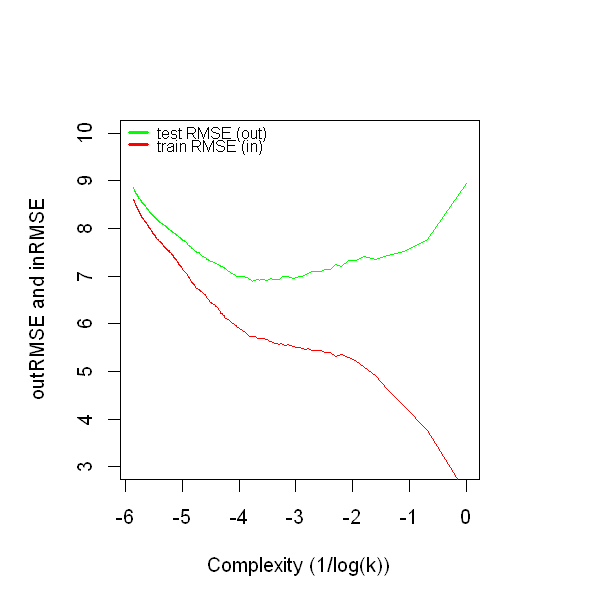

In [15]:
#Overall plot size
options(repr.plot.width=5, repr.plot.height=5)

#Setting margins and how many plot should be included
par(mfrow=c(1,1),mar=c(5,5,5,5))

plot(log(1/kvec), outRMSE, type="l",
    ylab = 'outRMSE and inRMSE', xlab = 'Complexity (1/log(k))',
     col = 'green', ylim=range(3:10))
lines(log(1/kvec), inRMSE, col='red')
legend(x = 'topleft',
      legend = c('test RMSE (out)', 'train RMSE (in)'),
      col = c('green', 'red'),
      lwd = 3,          #linewidth
      bty = 'n',        #boundary type for legend
      lty = c(1,1),     #line type
      cex=.8, pt.cex=1  #Changing legend size
      )



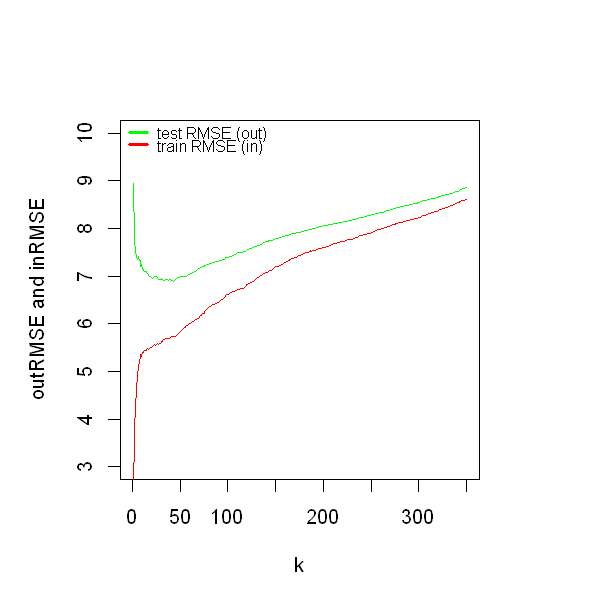

In [16]:
options(repr.plot.width=5, repr.plot.height=5)

par(mfrow=c(1,1),mar=c(5,5,5,5))

plot(kvec, outRMSE, type="l",
    ylab = 'outRMSE and inRMSE', xlab = 'k',
     col = 'green', ylim=range(3:10))
lines(kvec, inRMSE, col='red')
legend(x = 'topleft',
      legend = c('test RMSE (out)', 'train RMSE (in)'),
      col = c('green', 'red'),
      lwd = 3,
      bty = 'n',
      lty = c(1,1),
      cex=.8, pt.cex=1)

In [17]:
#The best value for hyperparameter k
kbest = which.min(outRMSE)
kbest

#The complexity that should be associated with RM
log(1/kbest)

[1] 43

[1] -3.7612

Now we plot the results.

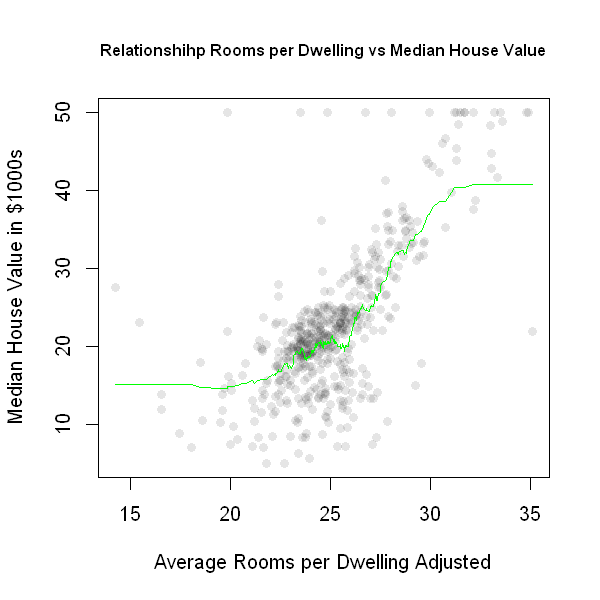

In [19]:
#Sort the RM values
testData = data.frame(x=sort(dataframe$x))

#Gather the index from the kvec vector to use as our hyperparameter
kbest = kknn(y~x, dataframe, testData, k=kvec[which.min(outRMSE)], kernel='rectangular')

plot(dataframe, pch=16, col=rgb(0,0,0,0.1), 
     xlab = 'Average Rooms per Dwelling Adjusted', 
     ylab='Median House Value in $1000s',
     main = 'Relationshihp Rooms per Dwelling vs Median House Value', 
     cex.main=.8
    )

lines(testData$x, kbest$fitted, col = 'green')

The best ***k*** value to use according to the test data is 43. We should tune our hyperparameter to this in order to produce the best model for ***RM*** and ***MEDV***. In the middle, the model shows the most linearity while the edges seem to imply no correlation since they are nearly horizontal. 

### Concluding Remarks

For the first analysis, the model strongly suggests that more parameters should be of a higher order term based on the residual plot. Consequently, an interaction between some terms may be present as well. It may be of interest to perform followups using SAS, and examining the scatterplots of individual variables may prove useful as well. If it's the case that a higher order term is more significant, further testing with that variable among the others may have to be conducted.

For the second analysis, observations near the minimum and maximum have a constant relationship, but the larger part of the data in the center showed a strong form with a positive shape. This machine learning method is more nuanced in that we use the model with the hyperparameter that gives us the least amount of variation, rather than just a simple linear regression model that would have had a higher RMSE value. This model demostrates how normal simple linear regression would not be as accurate for out of sample predictions. This machine learning method is more nuanced since it takes data from the nearest neighbors, so it's not as biased as a simple linear regression model. 

### Appendix

Link of the data: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data